In [1]:
library(ISLR)

In [2]:
head(Auto)

mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
15,8,350,165,3693,11.5,70,1,buick skylark 320
18,8,318,150,3436,11.0,70,1,plymouth satellite
16,8,304,150,3433,12.0,70,1,amc rebel sst
17,8,302,140,3449,10.5,70,1,ford torino
15,8,429,198,4341,10.0,70,1,ford galaxie 500


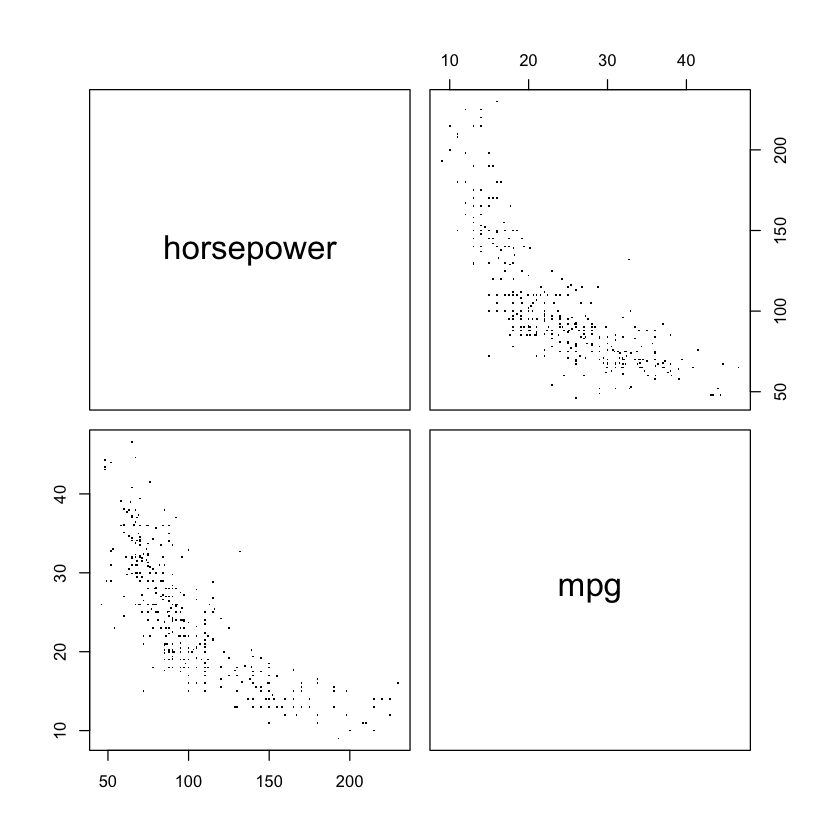

In [3]:
pairs(Auto[c('horsepower', 'mpg')], pch='.', )

## 5.3.1 - "The Validation Set Approach"

In [4]:
set.seed(2)

In [5]:
train=sample(392,196)

In [6]:
attach(Auto)

In [7]:
lm.fit=lm(mpg ~ horsepower ,data=Auto,subset=train)

In [8]:
mean((mpg-predict(lm.fit,Auto))[-train]^2)

[1] 25.72651

In [9]:
summary(lm.fit)


Call:
lm(formula = mpg ~ horsepower, data = Auto, subset = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.1323  -3.1192  -0.3455   2.8183  15.7110 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 39.028044   0.956710   40.79   <2e-16 ***
horsepower  -0.151329   0.008491  -17.82   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.756 on 194 degrees of freedom
Multiple R-squared:  0.6208,	Adjusted R-squared:  0.6189 
F-statistic: 317.6 on 1 and 194 DF,  p-value: < 2.2e-16


In [10]:
lm.fit2=lm(mpg ~ poly(horsepower ,2),data=Auto,subset=train)

In [11]:
mean((mpg-predict(lm.fit2,Auto))[-train]^2)

[1] 20.43036

In [12]:
summary(lm.fit2)


Call:
lm(formula = mpg ~ poly(horsepower, 2), data = Auto, subset = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-14.242  -2.326  -0.285   2.322  13.936 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            23.1207     0.3041  76.027  < 2e-16 ***
poly(horsepower, 2)1 -118.3050     5.7947 -20.416  < 2e-16 ***
poly(horsepower, 2)2   41.4407     5.8775   7.051 3.09e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.252 on 193 degrees of freedom
Multiple R-squared:  0.6985,	Adjusted R-squared:  0.6954 
F-statistic: 223.6 on 2 and 193 DF,  p-value: < 2.2e-16


In [13]:
lm.fit3=lm(mpg ~ poly(horsepower ,3),data=Auto,subset=train)

In [14]:
mean((mpg-predict(lm.fit3,Auto))[-train]^2)

[1] 20.38533

In [15]:
summary(lm.fit3)


Call:
lm(formula = mpg ~ poly(horsepower, 3), data = Auto, subset = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.2413  -2.2862  -0.3165   2.2763  13.8466 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            23.1204     0.3045  75.923  < 2e-16 ***
poly(horsepower, 3)1 -118.2890     5.8027 -20.385  < 2e-16 ***
poly(horsepower, 3)2   41.8624     5.9171   7.075 2.72e-11 ***
poly(horsepower, 3)3   -4.1447     6.0041  -0.690    0.491    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.258 on 192 degrees of freedom
Multiple R-squared:  0.6992,	Adjusted R-squared:  0.6945 
F-statistic: 148.8 on 3 and 192 DF,  p-value: < 2.2e-16


In [16]:
lm.fit4=lm(mpg ~ poly(horsepower ,4),data=Auto,subset=train)

In [17]:
mean((mpg-predict(lm.fit4,Auto))[-train]^2)

[1] 20.30902

## 5.3.2 - "Leave-One-Out Cross-Validation"

In [18]:
glm.fit = glm(mpg ~ horsepower, data=Auto)

In [19]:
coef(glm.fit)

(Intercept)  horsepower 
 39.9358610  -0.1578447

In [20]:
# which is the same as......
coef(lm(mpg~horsepower, data=Auto))

(Intercept)  horsepower 
 39.9358610  -0.1578447

In [21]:
library(boot)

In [22]:
glm.fit = glm(mpg ~ horsepower, data=Auto)

In [23]:
# compute LOOCV
cv.err = cv.glm(Auto, glm.fit)
# cv.err  # this is big

In [24]:
cv.err$delta

[1] 24.23151 24.23114

what are these two values? one is test MSE... what's the other?

see p. 194:
_the two numbers associated with delta differ slightly. The first is the standard k-fold CV estimate, as in (5.3). The second is a bias- corrected version._

In [25]:
cv.error=rep(0,5)

In [26]:
for (i in 1:5) {
    glm.fit = glm(mpg ~ poly(horsepower, i), data=Auto)
    cv.error[i] = cv.glm(Auto, glm.fit)$delta[1]  # what about delta[0] ??
}

In [27]:
cv.error

[1] 24.23151 19.24821 19.33498 19.42443 19.03321

## 5.3.3 - "k-Fold Cross-Validation"

In [28]:
set.seed(17)

In [29]:
cv.error.10 = rep(0,10)

In [30]:
for (i in 1:10) {
    glm.fit = glm(mpg ~ poly(horsepower, i), data=Auto)
    cv.error.10[i] = cv.glm(Auto, glm.fit, K=10)$delta[1]
}

In [31]:
cv.error.10

[1] 24.27207 19.26909 19.34805 19.29496 19.03198 18.89781 19.12061 19.14666
 [9] 18.87013 20.95520